# Использование готовых моделей

Мы рассмотрели на лекции, что научное сообщество придумало и протестировало много моделей, которые до сих пор не перестают улучшать результаты.

Движение open-source и эффективные, удобные фреймворки дали невероятный толчок развитию machine learning и deep learning потому что сократило путь от научной статьи до возможности применить описанные методы до нескольких минут -- ведь стало распростаненной практикой выкладывать архитектуры и веса к ним в открытый доступ.

Как же получить доступ к таким полезным ресурсам? Новые статьи часто дают ссылку на github где подробно написано как можно использовать и обучать модели.

А для самых распростаненных архитектур есть реализации прямо внутри библиотек. В этом уроке мы познакомимся с тем, как использовать готовые модели в Keras для классификации. Т.е. как производить **инференс**.



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-05-03 12:49:38.575846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 12:49:39.450580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-05-03 12:49:40.733531: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 12:49:40.771886: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 12:49:40.772153: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Для того чтобы получить доступ к реализованным моделям, достаточно обратится к tf.keras.applications.

Например, попробуем определить знакому нам VGG19

In [2]:
vgg19 = tf.keras.applications.VGG19()

2024-05-03 12:49:49.710106: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 12:49:49.710380: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 12:49:49.710571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [3]:
# посмотрим на саммари
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# но модель инициализирована случайными весами. поэтому делать с помощью нее предсказания -- бесполезно
# с помощью weights='imagenet' -- инициализируем ее параметрами, которые получились при ее обучении на imagenet
# (они скачиваются из интернета)
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [5]:
# скачаем несколько картинок
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2024-05-03 12:51:24--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2024-05-03 12:51:24--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113,35K  --.-KB/s    in 0,09s   

2024-05-03 12:51:25 (1,21 MB/s) - ‘panda.jpg’ saved [116068/116068]

--2024-05-03 12:51:25--  https://5.imimg.com/data5/CB/DA/MY-

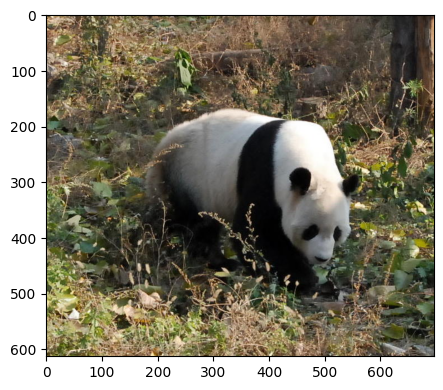

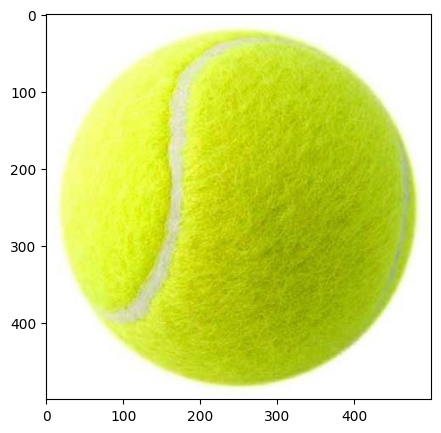

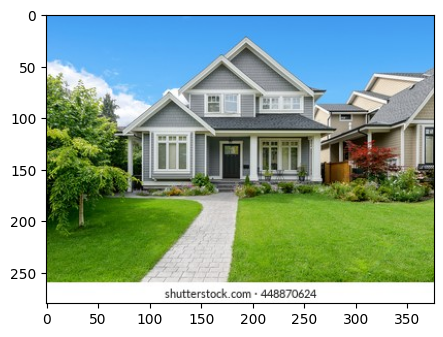

In [6]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")

In [7]:
# попробуем применить сеть к нашему изображению?
vgg19.predict(panda.astype(np.float32)[None, ...])

ValueError: Input 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 613, 696, 3)

In [8]:
# оказывается, модель ожидает определенный размер, учтем это

def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]


prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [9]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

I0000 00:00:1714729950.028309   32836 service.cc:145] XLA service 0x7761500057c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714729950.028346   32836 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2024-05-03 12:52:30.045140: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-03 12:52:30.136277: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


I0000 00:00:1714729951.330730   32836 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
# что это?)
prediction

array([[1.24574917e-09, 3.30730970e-10, 3.24182849e-08, 5.64250735e-09,
        1.52659236e-08, 3.45824844e-08, 3.66372745e-07, 1.31885625e-09,
        2.10608082e-08, 6.52495280e-10, 1.46589491e-10, 1.42896694e-09,
        3.60412707e-11, 1.04988711e-08, 1.52083723e-09, 8.16268511e-11,
        1.20760910e-11, 1.53734803e-08, 4.95869443e-08, 1.25919982e-07,
        1.10416468e-10, 5.21277119e-11, 1.18818927e-10, 4.70522998e-09,
        4.95737201e-11, 1.69629449e-11, 6.26492174e-12, 1.69167653e-12,
        7.26630422e-11, 8.82417339e-09, 6.22404558e-12, 6.00249503e-11,
        9.89186944e-12, 4.44689308e-09, 1.02983094e-10, 5.39581227e-11,
        5.12366316e-10, 4.47756207e-11, 1.06405596e-11, 1.66377296e-12,
        2.38313241e-11, 1.15517990e-12, 2.61154163e-13, 3.37588377e-12,
        1.35183065e-12, 2.87073976e-10, 6.54898774e-11, 3.90626854e-12,
        9.33056743e-10, 3.82740055e-11, 4.24167264e-11, 8.06975020e-09,
        7.65117067e-11, 2.19248595e-11, 7.31843405e-11, 6.373948

In [11]:
prediction.sum(), prediction.shape # предсказали вероятности 1000 классов. а как расшифровать?

(0.9999999, (1, 1000))

In [12]:
from tensorflow.keras.applications.vgg19 import decode_predictions

input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n02510455', 'giant_panda', 0.96490395),
  ('n02395406', 'hog', 0.013631381),
  ('n02134084', 'ice_bear', 0.007675187),
  ('n02120079', 'Arctic_fox', 0.007050984),
  ('n02108915', 'French_bulldog', 0.0020282832)]]

На самом деле в примере выше нам повезло. Мы забыли очень важную часть -- препроцессинг картинки. Для каждой сети он свой и находитя рядом с ней:

In [13]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# добавим этап препроцессинга и получим еще более правильный ответ
input_image = prepare_image(panda, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[[('n02510455', 'giant_panda', 0.99941325),
  ('n02445715', 'skunk', 0.00030085148),
  ('n02120079', 'Arctic_fox', 0.00017698362),
  ('n02395406', 'hog', 6.9855036e-05),
  ('n02114548', 'white_wolf', 8.850084e-06)]]

In [14]:
# сделаем из этого удобную функцию

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")

    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [15]:
# и применим на мячике
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -103.93900299072266.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[[('n04409515', 'tennis_ball', 0.99981916),
  ('n04039381', 'racket', 0.00012422081),
  ('n03445777', 'golf_ball', 2.2719107e-05),
  ('n02799071', 'baseball', 6.2213203e-06),
  ('n03134739', 'croquet_ball', 5.7042257e-06)]]

А теперь попробуем другую сеть -- MobileNetV2

In [16]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights="imagenet")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
make_prediction(mobilenet, preprocess_input, decode_predictions, panda)
# почему неправильно ??

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n09229709', 'bubble', 0.0591882),
  ('n04418357', 'theater_curtain', 0.049737424),
  ('n04254680', 'soccer_ball', 0.031445097),
  ('n04442312', 'toaster', 0.028625993),
  ('n02782093', 'balloon', 0.025876887)]]

**Мы применили препроцессинг одной сети к другой. Это и привело к неправильным предсказаниям.** Это очень важно. Всегда пытайтесь понять что именно на вход принимает та или иная сеть. Каким-то достаточно просто нормализации на 0-1, другие ожидают значения от -1 до 1. Будьте внимательны! И используйте правильные функции

In [18]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as decode_predictions_mobilenet

make_prediction(mobilenet, preprocess_input_mobilenet, decode_predictions_mobilenet, panda)

Image shape: (1, 224, 224, 3). Max: 1.0. Min: -1.0.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[[('n02510455', 'giant_panda', 0.9089218),
  ('n02133161', 'American_black_bear', 0.0016609605),
  ('n04254680', 'soccer_ball', 0.0012464193),
  ('n02134084', 'ice_bear', 0.0011940585),
  ('n02412080', 'ram', 0.0011770967)]]

# Итог

Мы научились пользоваться готовыми моделями в Keras. А также на своем опыте убедились как важно правильно преобразовывать изображения перед инференсом. В практическом задании вы закрепите полученные знания.

# Практическое задание

Выполните предсказания с помощью двух любых сетей из tf.keras.applications для любых картинок (скачать можно аналогично или использовать загруженные). Также вы можете раскрыть боковое меню справа. Перейти во вкладку Files и воспользоваться Upload.

In [23]:
# < YOUR CODE HERE >
# ниже должен идти ваш собственный пример инференса двух любых сетей на разных картинках.
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as preprocess_input_eff
from tensorflow.keras.applications.efficientnet_v2 import decode_predictions as decode_predictions_eff
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B3

efficient_net = EfficientNetV2B3(weights="imagenet")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


[[('n04409515', 'tennis_ball', 0.92879635),
  ('n04039381', 'racket', 0.00154104),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.00071757677),
  ('n02799071', 'baseball', 0.00043356325),
  ('n07749582', 'lemon', 0.00041431896)]]

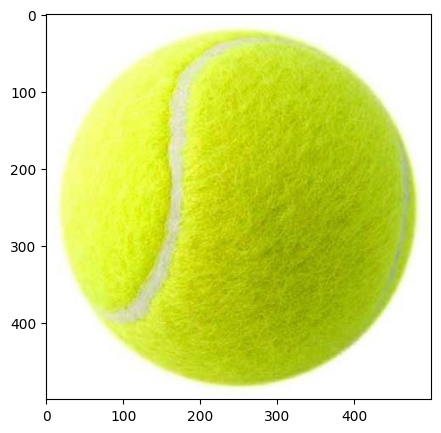

In [24]:
new = read_and_show("ball.jpg")
input_image = new
img_size = (efficient_net.input_shape[1], efficient_net.input_shape[2])
input_image = prepare_image(new, img_size)
input_image = preprocess_input_eff(input_image)
prediction = efficient_net.predict(input_image)
decode_predictions_eff(prediction)

In [29]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/640px-Grosser_Panda.JPG -O panda.jpg
!wget https://i.pinimg.com/originals/61/93/ed/6193ed6a82751ad6d728b1869c7a665e.jpg -O ball.jpg
!wget https://domikdomovenka.ru/files/products/popugay_ara.600x600.jpg -O ara.jpg

--2024-05-03 13:06:40--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/640px-Grosser_Panda.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96217 (94K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>]  93,96K  --.-KB/s    in 0,1s    

2024-05-03 13:06:40 (795 KB/s) - ‘panda.jpg’ saved [96217/96217]

--2024-05-03 13:06:41--  https://i.pinimg.com/originals/61/93/ed/6193ed6a82751ad6d728b1869c7a665e.jpg
Resolving i.pinimg.com (i.pinimg.com)... 172.64.149.192, 104.18.38.64, 2606:4700:4400::6812:2640, ...
Connecting to i.pinimg.com (i.pinimg.com)|172.64.149.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195345 (191K) [image/jpeg]
Saving to: ‘ball.jpg’

ball.jpg            100%[===================>] 190,7

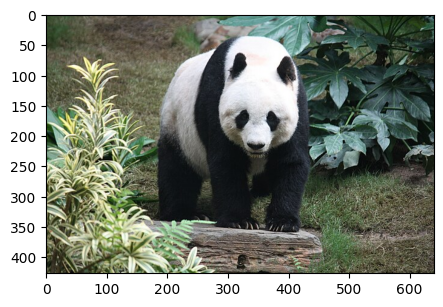

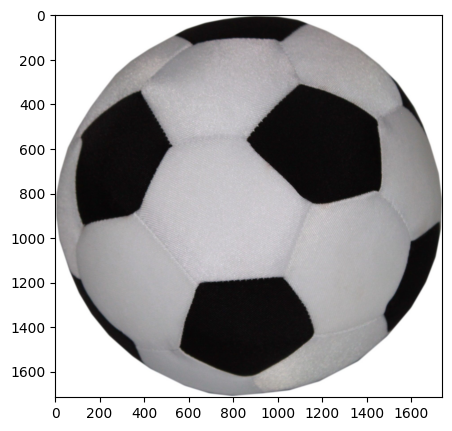

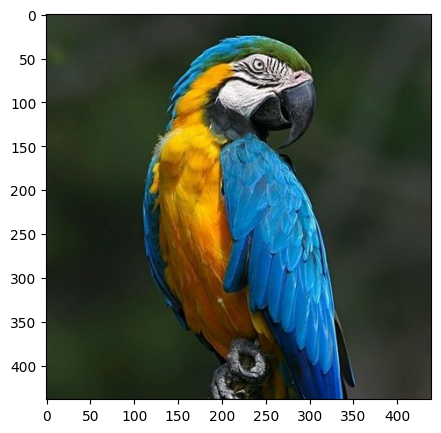

In [30]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
ara = read_and_show("ara.jpg")

In [31]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights="imagenet")
make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, ara)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n01818515', 'macaw', 0.99891895),
  ('n01828970', 'bee_eater', 0.00042551025),
  ('n01820546', 'lorikeet', 0.00029822948),
  ('n01819313', 'sulphur-crested_cockatoo', 8.825345e-05),
  ('n01843383', 'toucan', 6.135883e-05)]]

In [32]:
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.xception import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.xception import Xception

xception = Xception(weights="imagenet")
make_prediction(xception, preprocess_input_resnet, decode_predictions_resnet, panda)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Image shape: (1, 299, 299, 3). Max: 1.0. Min: -1.0.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n02510455', 'giant_panda', 0.9018359),
  ('n02509815', 'lesser_panda', 0.004165156),
  ('n02132136', 'brown_bear', 0.0014761924),
  ('n02133161', 'American_black_bear', 0.0012030763),
  ('n02134084', 'ice_bear', 0.0011007653)]]

In [37]:
def make_prediction(model, preprocess_input, decode_predictions, image):
  img_size = (model.input_shape[1], model.input_shape[2])
  input_image = prepare_image(image, (img_size))
  input_image = preprocess_input(input_image)

  prediction = model.predict(input_image)
  return decode_predictions(prediction)

In [39]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights="imagenet")
make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, ball)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n04254680', 'soccer_ball', 0.9997977),
  ('n03530642', 'honeycomb', 0.00015757851),
  ('n04540053', 'volleyball', 1.0944022e-05),
  ('n02790996', 'barbell', 1.03209695e-05),
  ('n03255030', 'dumbbell', 6.5563418e-06)]]